In [229]:
import numpy as np 
import pandas as pd 
import geopandas as gpd 
import matplotlib.pyplot as plt 
import seaborn as sns
from plotnine import *
%matplotlib inline 
%config InlineBackend.figure_format='retina'
# set figures path 
Fig = 'Figures/'

# 1. Evolution of the COVID-related mortality rate in European countries

In [19]:
# figure 1 
ds = pd.read_excel('../../02_Data/02_Pandemic variables/03_Exc. Mortality/Excess_mortality_database_v220103.xls',
              sheet_name = 'Excess_mortality_Abs', skiprows = 1).drop(['Code 2016', 'NUTS level 3', 'Pop_2020'], axis =1)

In [20]:
ds = ds.groupby('Country code').mean().T
ds

Country code,AL,AT,BE,BG,CH,CY,CZ,DE,DK,EE,...,NL,NO,PL,PT,RO,RS,SE,SI,SK,UK
2020_W01,-3.766667,-5.577143,-3.554545,-16.892857,-5.946154,21.2,-4.314286,-29.390625,-0.400000,-16.566667,...,-4.455,-6.454545,-0.556164,-11.888,-13.809524,-14.744,-7.304762,-21.6,-1.475,1.678212
2020_W02,-3.116667,-4.434286,-0.990909,-10.571429,-4.369231,15.2,-1.257143,-12.765625,3.181818,-6.200000,...,0.290,1.454545,-3.706849,-6.112,-12.509524,-12.704,-2.933333,-30.2,-6.100,-10.703911
2020_W03,-6.233333,0.297143,-2.472727,-12.278571,-2.730769,26.8,-10.357143,-37.515625,-2.854545,-8.533333,...,-3.285,-5.872727,-6.580822,-3.816,-10.161905,-3.504,-5.542857,-35.8,-14.250,-9.215642
2020_W04,-3.100000,0.908571,-4.963636,-4.135714,-1.600000,11.2,-3.514286,-64.968750,-6.090909,-12.133333,...,-7.255,-3.436364,-8.213699,-6.544,-11.071429,1.184,-9.219048,-20.4,-6.675,-10.992179
2020_W05,-2.466667,3.662857,-3.500000,-0.764286,-1.576923,21.2,-2.971429,-37.609375,-5.018182,-10.800000,...,-3.605,-6.490909,-4.268493,-0.224,-9.123810,2.096,-1.838095,-11.4,-7.750,-6.649162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021_W39,NaN,5.737143,0.759091,36.635714,2.638462,24.2,3.914286,85.281250,14.363636,60.400000,...,9.355,5.290909,9.887671,5.464,66.619048,56.832,3.266667,78.6,13.475,8.926257
2021_W40,NaN,2.748571,1.886364,39.400000,-1.384615,13.2,-0.914286,88.359375,8.509091,51.200000,...,8.680,5.945455,11.690411,8.464,105.352381,62.248,-1.961905,35.6,28.075,9.186592
2021_W41,NaN,3.342857,4.318182,49.892857,1.784615,25.2,6.185714,83.812500,15.381818,72.600000,...,6.030,4.000000,13.175342,10.424,135.747619,57.968,-0.800000,69.2,26.700,7.934078
2021_W42,NaN,6.280000,7.431818,62.221429,1.915385,21.8,15.085714,144.765625,13.200000,71.600000,...,12.725,8.400000,15.797260,3.832,150.423810,46.944,2.323810,97.2,37.575,8.556425


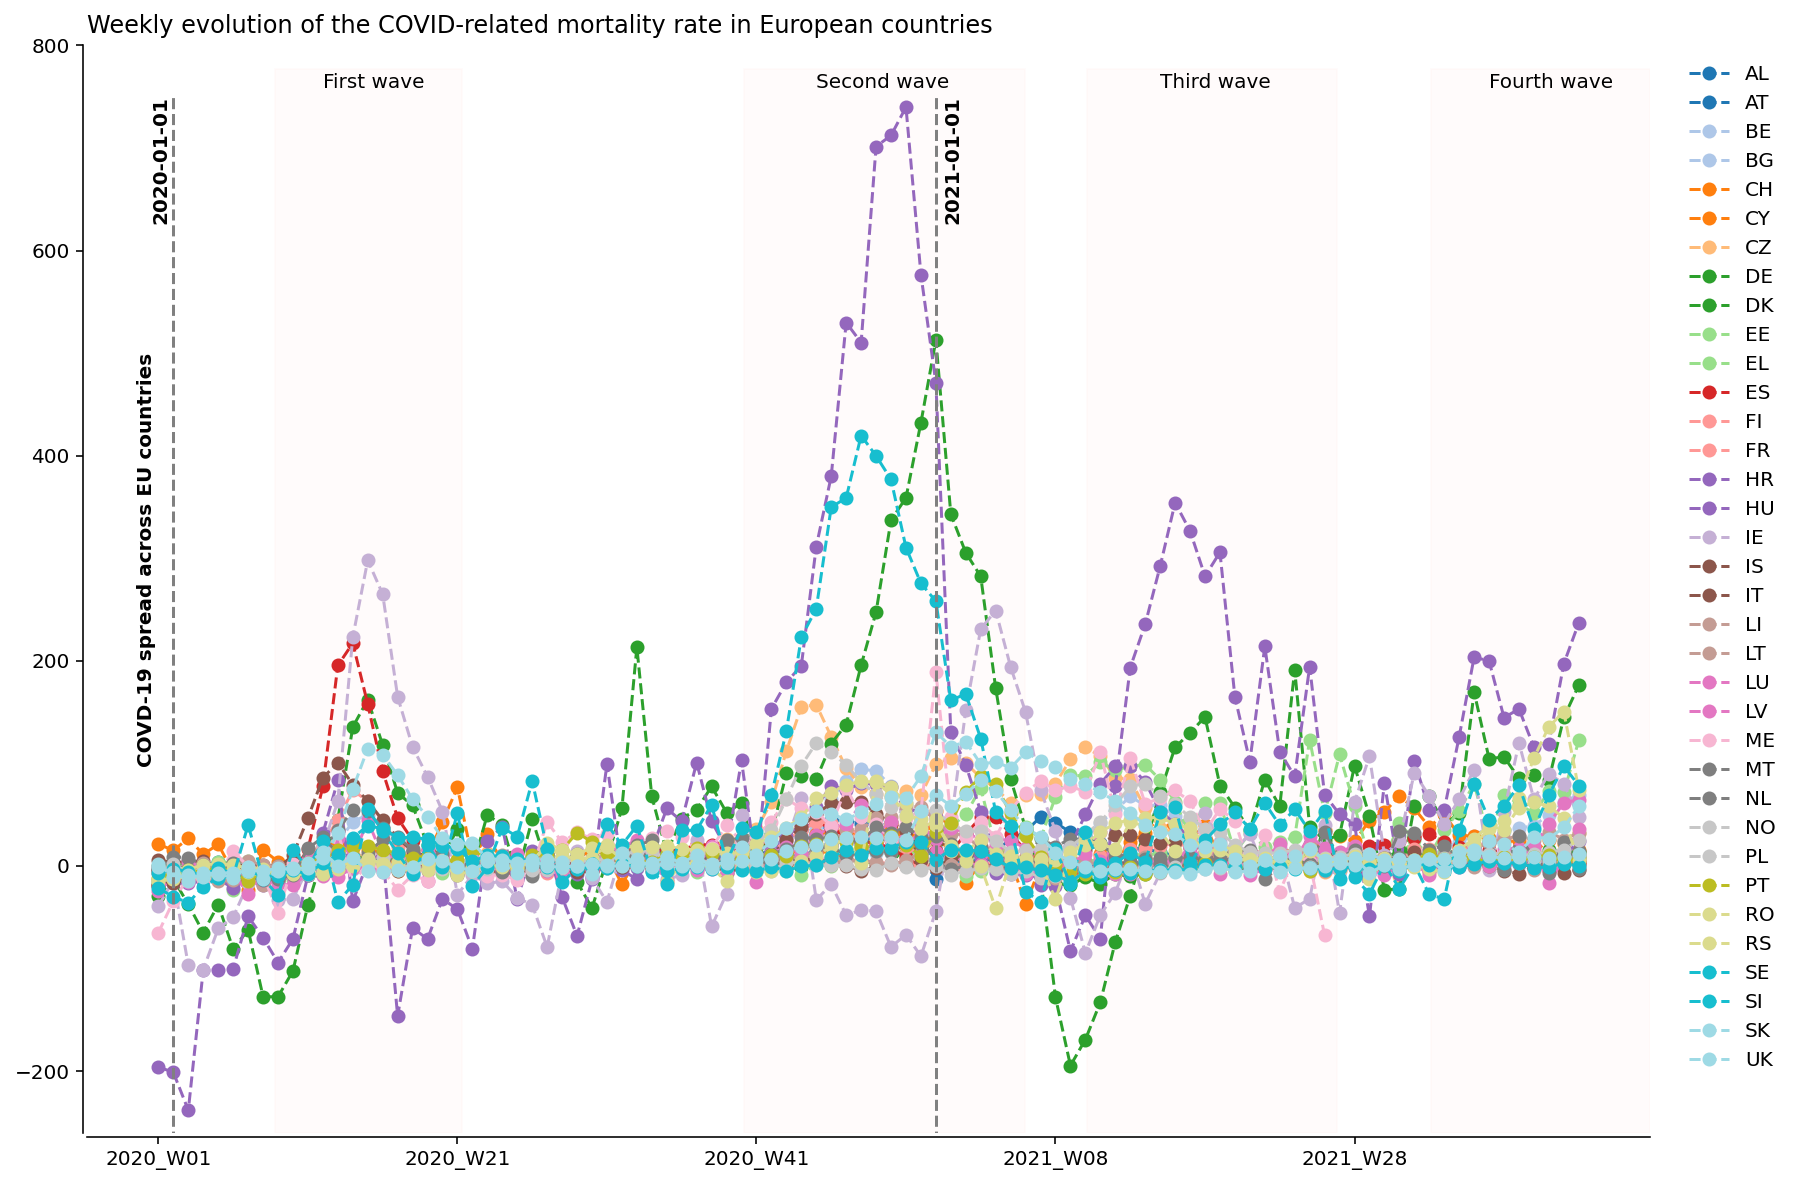

In [177]:
with plt.style.context('seaborn-deep'):
    ds.plot(figsize = (14,10), marker = 'o', linestyle = '--', cmap = 'tab20')
plt.title('Weekly evolution of the COVID-related mortality rate in European countries',
          loc = 'left', fontweight = 'light')

plt.text(x = -1.4, y = 100, s = 'COVD-19 spread across EU countries', rotation = 90, fontweight = 'bold')
# add the years 
plt.vlines(x = 1, ymin = -300, ymax = 750, color = 'grey', linestyle = 'dashed')
plt.text(x = -0.5, y = 630, s = '2020-01-01', rotation = 90, fontweight = 'bold')

plt.vlines(x = 52, ymin = -300, ymax = 750, color = 'grey', linestyle = 'dashed')
plt.text(x = 52.5, y = 630, s = '2021-01-01', rotation = 90, fontweight = 'bold')

# add the waves 
plt.axhspan(xmin =0.12, xmax = 0.24, ymin = -260, ymax = 777, color = 'tomato', alpha= .02)
plt.text(x = 11, y = 758, s = 'First wave', fontweight = 'light')

plt.axhspan(xmin =0.42, xmax = 0.6, ymin = -260, ymax = 777, color = 'tomato', alpha= .02)
plt.text(x = 44, y = 758, s = 'Second wave', fontweight = 'light')

plt.axhspan(xmin =0.64, xmax = 0.8, ymin = -260, ymax = 777, color = 'tomato', alpha= .02)
plt.text(x = 67, y = 758, s = 'Third wave', fontweight = 'light')


plt.axhspan(xmin =0.86, xmax = 1, ymin = -260, ymax = 777, color = 'tomato', alpha= .02)
plt.text(x = 89, y = 758, s = 'Fourth wave', fontweight = 'light')

plt.ylim([-260, 800])
plt.legend(loc = [1.02, .05], frameon = False).set_title('')
sns.despine(offset=2)

# plt.savefig(Fig + 'Figure_01.png', dpi = 500)

# 2. COVID-19 deaths rate per 10_000 inhabitants (three waves)

Draw three maps corresponding to each COVID-19 wave.

In [215]:
## read the death's df 
deaths = pd.read_excel('../../02_Data/03_Explanatory varibales/Output/Xis.xlsx')

d = deaths.filter(like = 'D_').iloc[:,-3:]

## read the shape file 
shape = gpd.read_file('../../02_Data/01_GIS/02_Full file/Full shape/Full shape.shp')
shape = shape.to_crs(epsg = 3035)

In [251]:
# set mamp general general aspect 

plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.4
plt.rcParams['grid.color'] = "white"
plt.rcParams['axes.facecolor'] = '#f4f9fa'
plt.rcParams['figure.dpi'] = 80

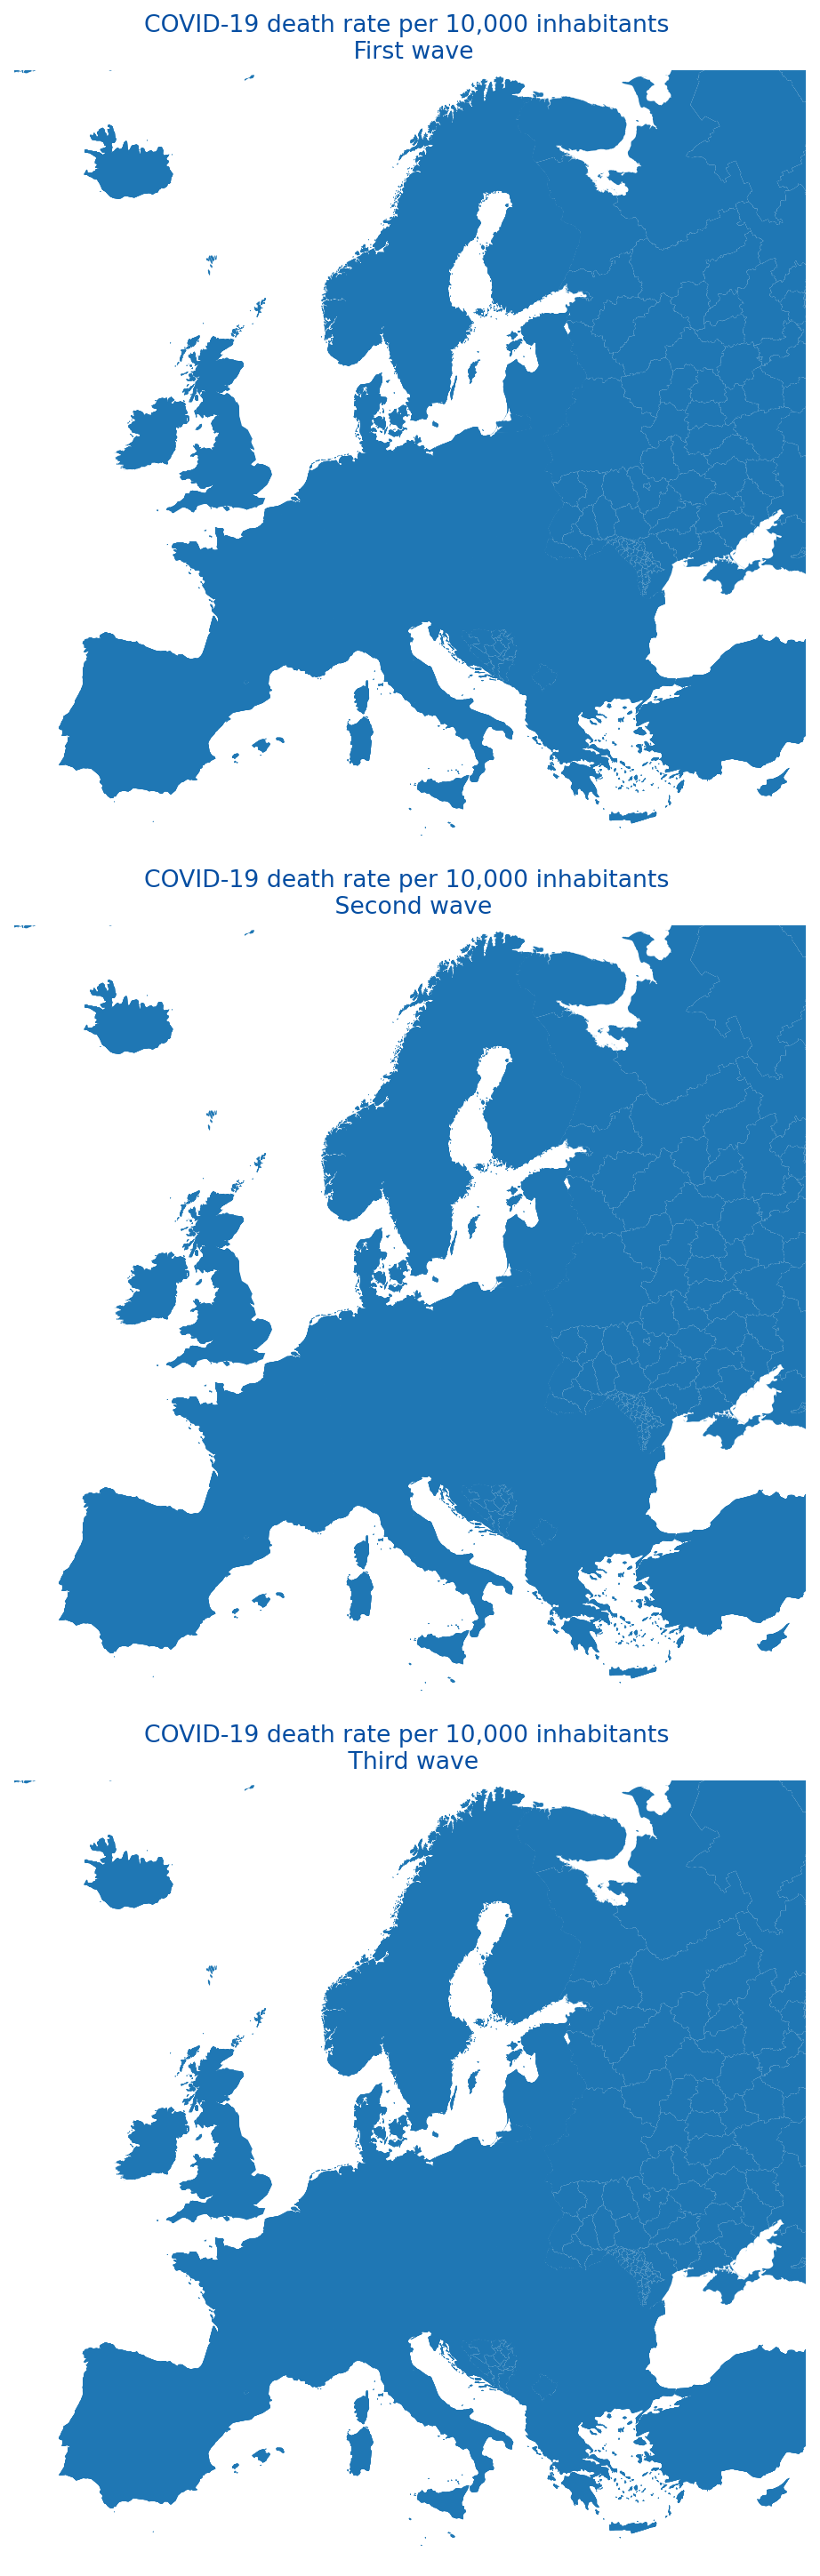

In [257]:
# plot the maps 

fig, ax = plt.subplots(3,1, figsize = (19, 18), constrained_layout = True)
shape.plot(ax = ax[0])
ax[0].set_xlim(2.4e6, 6.6e6)
ax[0].set_ylim(0.13e7, 0.545e7)
ax[0].set_title('COVID-19 death rate per 10,000 inhabitants \n First wave', loc = 'center', color = '#054ea2')

shape.plot(ax = ax[1])
ax[1].set_title('COVID-19 death rate per 10,000 inhabitants \n Second wave', loc ='center', color = '#054ea2')
ax[1].set_xlim(2.4e6, 6.6e6)
ax[1].set_ylim(0.13e7, 0.545e7)

shape.plot(ax = ax[2])
ax[2].set_title('COVID-19 death rate per 10,000 inhabitants \n Third wave', loc = 'center', color = '#054ea2')
ax[2].set_xlim(2.4e6, 6.6e6)
ax[2].set_ylim(0.13e7, 0.545e7)

for i in range(3): 
    ax[i].axis('off')

plt.show()

# plt.savefig(Fig + 'Figure_02.png', dpi = 500)

## 3. Z-score map 

Deaw three maps corresponding to the z-score of the deaths rates

In [243]:
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler() 
data = scaler.fit(d_rate)

In [ ]:
# make the bins and convert to categorical ordinal values 



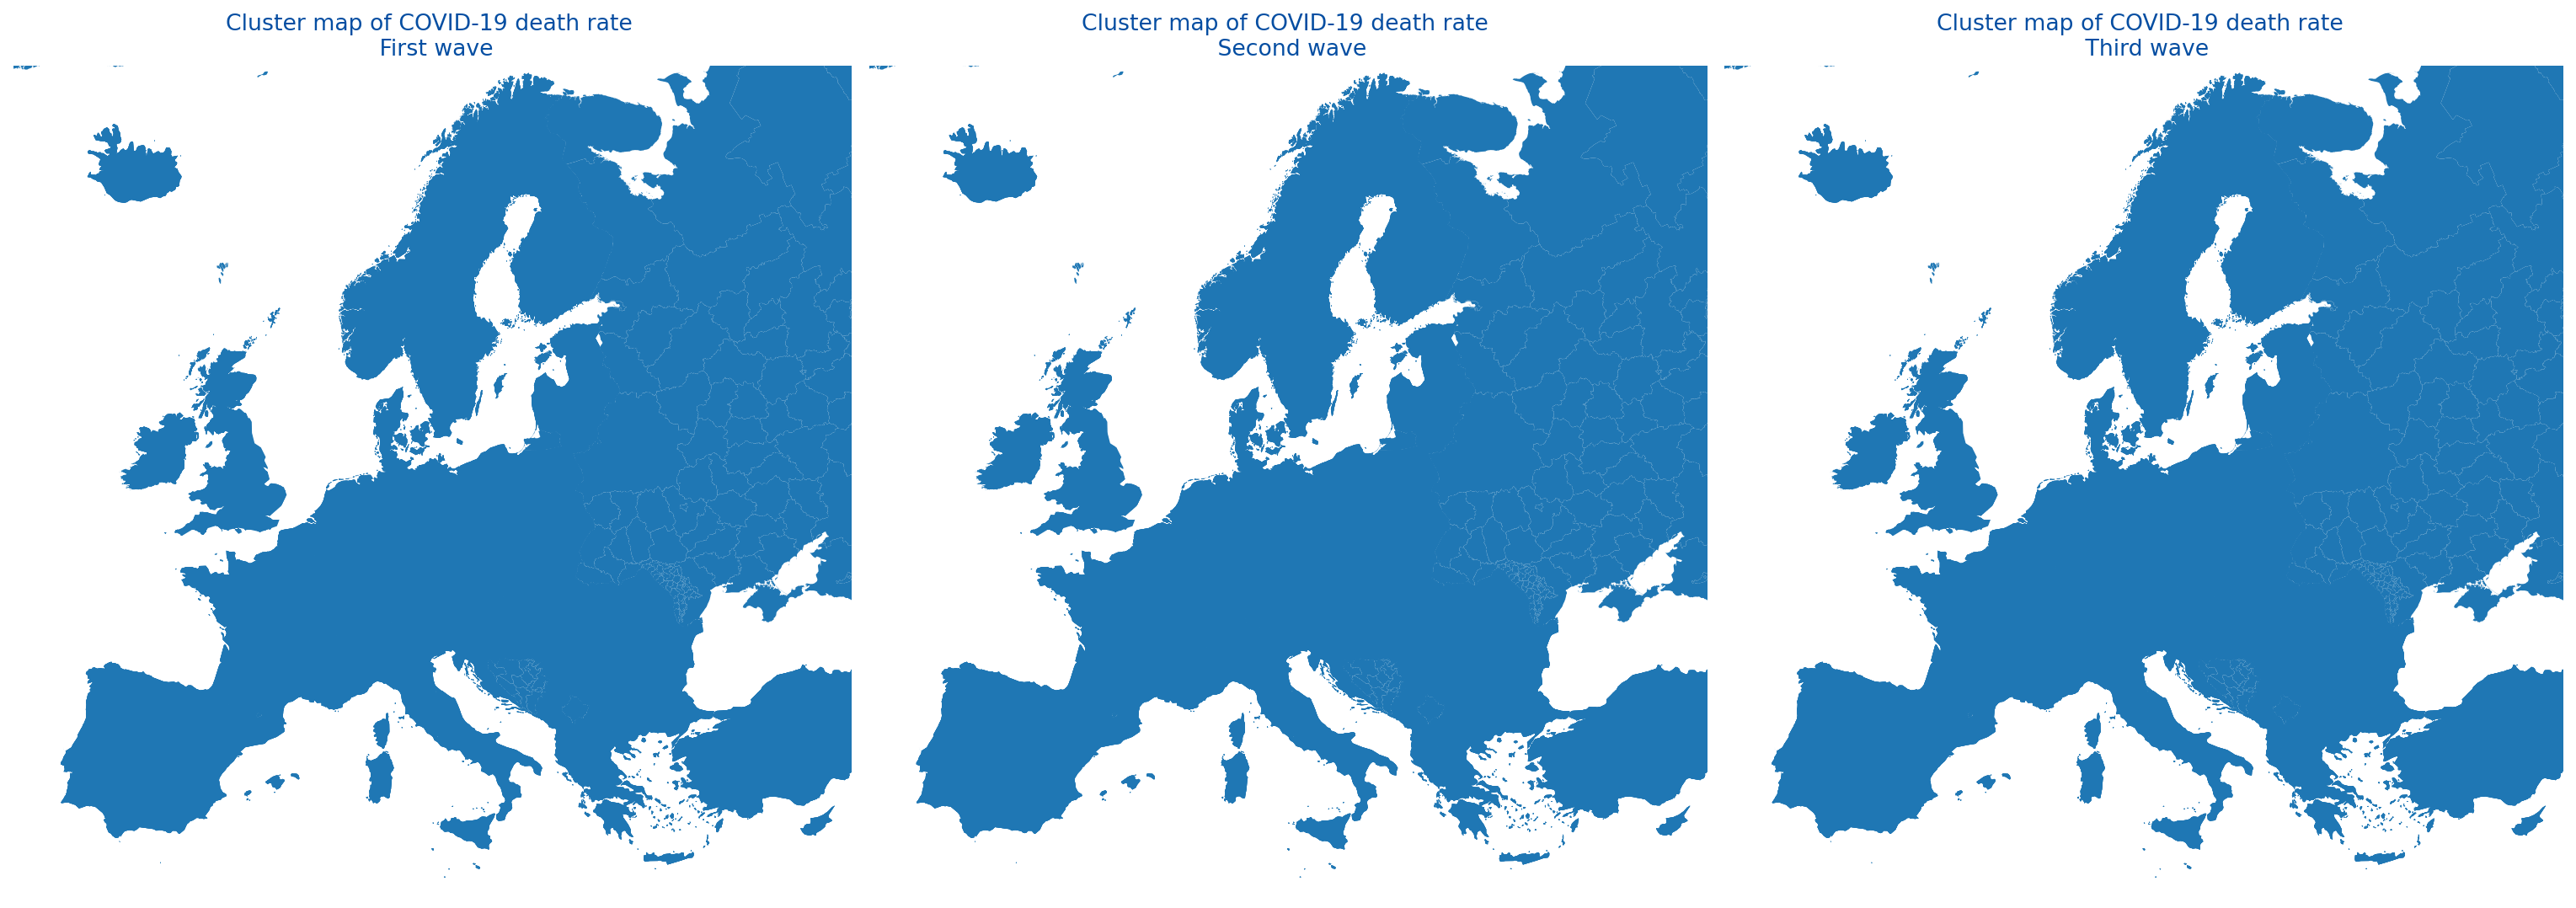

In [256]:
# plot the maps 

fig, ax = plt.subplots(3,1, figsize = (19, 18), constrained_layout = True)
shape.plot(ax = ax[0])
ax[0].set_xlim(2.4e6, 6.6e6)
ax[0].set_ylim(0.13e7, 0.545e7)
ax[0].set_title('Cluster map of COVID-19 death rate \n First wave', loc = 'center', color = '#054ea2')

shape.plot(ax = ax[1])
ax[1].set_title('Cluster map of COVID-19 death rate \n Second wave', loc ='center', color = '#054ea2')
ax[1].set_xlim(2.4e6, 6.6e6)
ax[1].set_ylim(0.13e7, 0.545e7)

shape.plot(ax = ax[2])
ax[2].set_title('Cluster map of COVID-19 death rate \n Third wave', loc = 'center', color = '#054ea2')
ax[2].set_xlim(2.4e6, 6.6e6)
ax[2].set_ylim(0.13e7, 0.545e7)

for i in range(3): 
    ax[i].axis('off')

plt.show()


# plt.savefig(Fig + 'Figure_03.png', dpi = 500)

# 4. COVID-19 Deaths by country 

In [258]:
# read the data 



# group the death-d by country & wave 


# group the death-d by country & wave per 1 million pop 





,D_first_wave,D_second_wave,D_third_wave
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,291.0,699.0,0.0
4,125.0,525.0,22.0
...,...,...,...
4702,NaN,NaN,NaN
4703,NaN,NaN,NaN
4704,NaN,NaN,NaN
4705,NaN,NaN,NaN


# 7. Descriptive statistics

# 6. Correlation matrix